In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
#Load the tags.csv from the Foodboost Dataset and drop the not important columns.

In [3]:
df_tag = pd.read_csv('Dataset Foodboost/tags.csv').drop(['Unnamed: 0', 'recipe'], axis=1)
tags = df_tag['tag'].unique()
tags

array(['hollands', 'gebak', 'sinterklaas', 'sinterklaasavond', 'oven',
       'vooraf te maken', 'lactosevrij', 'thais', 'aziatisch', 'curry',
       'hoofdgerecht', 'koken', 'glutenvrij', 'frans', 'wrap',
       'borrelhapje', 'borrel', 'kerst', 'oud &amp; nieuw', 'traktatie',
       'pasen', 'indonesisch', 'verjaardag', 'wat eten we vandaag',
       'slank', 'mexicaans', 'saus/dressing', 'bijgerecht', 'vegetarisch',
       'europees', 'bakken', 'chinees', 'frituren', 'italiaans', 'pasta',
       'snel', 'stamppot', '5-ingrediënten', 'ontbijt', 'soep',
       'maaltijdsoep', 'budget', 'couscous', 'zonder vlees/vis', 'rijst',
       'nagerecht', 'drankje zonder alcohol', 'halloween', 'gourmet',
       'veganistisch', 'stoven', 'noedels', 'gezond', 'pocheren',
       'in te vriezen', 'kinderrecepten', 'lunch', 'turks',
       'midden-oosters', 'tussendoortje', 'brood/sandwiches', 'stomen',
       'advertorial', 'kindergerecht', 'engels', 'brunch', 'noord-afrika',
       'salade', 'grill

In [4]:
#Load the recipes.csv from the Foodboost Dataset
df_recipes = pd.read_csv('Dataset Foodboost/recipes.csv')

# Drop the not important columns
df_recipes.drop([ 'Unnamed: 0', 'persons','time','calories','stars','url','image'], axis = 1, inplace = True)

# Select 200 random recipes
df_recipes_lekker = df_recipes.sample(n=200)

# This code below is ran once to print the 200 recipes so that it could be set to lekker or not by hand.
for i in range (200):
    
    random_recept = df_recipes_lekker.iloc[i]
    random_recept[0]
    #print("'" + random_recept[0] + "'" + ': ' + " ,")

lekker = {'Biefstuk met rodewijnsaus en ham': 1,
    'Plaatpizza met spruitjes en salami':  1,
'Zelfgemaakte zalmburger met bietensalade':  1,
'Rodekool met spekjes':  0,
'Sticky speklapjes met rozemarijnaardappeltjes':  0,
'Nasi met kip en zelfgemaakte boemboe':  1,
'Courgettetaart met haver fraîche':  0,
'Mexicaanse wraps met groente en gegrilde biefstuk':  1,
'Carpaccio-bonbon met kruidensalade':  1,
'Mojito met gember en jalapeño':  0,
'Couscous met gebakken kip, wortel, abrikozen en citroen ':  1,
'Wokmie met zoetzure omelet':  1,
'Zomerrisotto met mozzarella-braadworstjes':  1,
'Witvis met notentopping, bloemkool puree en salsa':  1,
'Gourmet-omelet met bosui en sesam':  1,
'Mexicaans stoofvlees met bonen':  1,
'Bietenhummus':  0,
'Opperdepop: kiphapje met wortel en doperwtjes 7-9 mnd':  1,
'Kleine tortillas met Hollandse Nieuwe':  1,
'Speltsalade met granaatappel en za’atar':  1,
'Vegaschnitzel met ratatouille uit de oven':  0,
'Gekruide rösti &amp; wortel met een zachtgekookt eitje':  1,
'Hartige popcorn':  0,
'Open sandwich met worst en mosterd':  1,
'Pittige gehaktballetjes met snelle bami':  1,
'Curryworstjes':  1,
'Gewokte bloemkool met rode curry':  0,
'Fit Girl Codes kip-mangosalade':  1,
'Saté babi van de bbq':  1,
'Kaasfondue dips':  1,
'Lasagne':  1,
'Oventosti met vegagehackt en geitenkaas':  0,
'Eenpersoonscurry':  1,
'Bananen-kokoscake':  1,
'White Russian':  1,
'Carpaccio van tomaat met parmezaan en pijnboompitten':  1,
'Aziatische koolsalade':  1,
'Wraps met krokante cajunkip, avocado &amp; citroencrème':  1,
'Braadworst met uien-stroopjus':  1,
'Spaanse surf &amp; turfspiesjes met pittige tomatensaus':  1,
'Kokospannenkoekjes met tropisch fruit':  1,
'Indiase curry met geroosterde bloemkool':  1,
'Geroosterde paprika met geitenkaas en pistache':  0,
'Sinaasappeltaart met eiwitschuim':  1,
'Krokante kaneelkrans':  1,
'Regenboogcarpaccio met pijnboompitten en parmaham':  0,
'Rijkgevulde groentebowl met tonijn &amp; pittige dressing':  0,
'Paprikaomelet met salade':  0,
'Tropische clafoutis met kokosmelk &amp; mango':  1,
'Vietnamese pho':  0,
'Zoete-aardappelfriet met vegaburgers':  0,
'Shichimi-zalm met aspergenoedels':  1,
'Thaise salade van gekneusde komkommers ':  0,
'Spekkoek met pisangroom':  1,
'Croque Buvette':  0,
'Hollandse rösti met sperziebonensalade':  0,
'Gegrilde kipdijfilet met rozemarijn':  1,
'Zoete-aardappelkoekjes met verse rozemarijn':  1,
'Volkorentoast met avocado &amp; eikruim':  1,
'Eipotjes met tomaten en spinazie':  1,
'Glutenvrije pizza met gerookte kip':  1,
'Bietentartaar met geitenkaas en gebakken kappertjes':  1,
'Boerenkoolstoof met chorizo':  1,
'Buddha-bowl met Chioggia-bietjes en bietenhummus':  0,
'Krokante schnitzel met zoete-aardappelgratin en broccoli':  1,
'Patatas bravas met biefstuk en broccoli':  1,
'Groenteomelet met sojasaus, champignons &amp; chili-mayosaus ':  0,
'Pulled chicken met chipotlesaus':  1,
'Goudbruine broc­co­li­-to­nijn­taart':  1,
'Patatas bravas':  1,
'Medaillons met avocadosalsa':  0,
'Zweedse gehaktballetjes met room':  1,
'Dunne crackers met ricotta-fetaspread en asperges':  1,
'Knapperige flowersprouts  ':  0,
'Mokka-havermout':  1,
'Pasta uit de oven met courgette':  1,
'Schelvis in ham met aardappelpuree en spinazie':  1,
'Lunchbowl met kikkererwten &amp; limoen-yoghurtdressing':  0,
'Garnalencocktail met aardappel en rucola':  1,
'Pompoenstoof':  0,
'Pasta met mosselen en lamsoren':  1,
'Spaghetti bolognese met rijkgevulde saus':  1,
'Spiegelei':  1,
'Gefrituurde augurkjes':  0,
'Snelle spaghetti met paddenstoelen en spekjes':  1,
'Gehaktspies met zelfgemaakte tzatziki':  1,
'Pizza bianca met rauwe parmaham':  0,
'Kip met tonijnsaus':  1,
'Tortillacracker met pompoen':  0,
'Biefstuk tagliata':  1,
'Warmgerookte zalm met pasta en tomatensaus':  1,
'Griekse yoghurt met appelcompote':  1,
'Kerstkip':  1,
'Piri piri drumsticks met tzatziki':  1,
'Traybake met vegetarische balletjes en ovengroenten':  0,
'Pasteitje kipragout met salade ':  1,
'Verse tagliolini met broccoli en venkelworst':  1,
'Pastasalade pesto met burrata ':  1,
'Couscous met pittige garnalen':  1,
'Pizzabaguettes met paprika en salami':  1,
'Gehaktballetjes met saus':  1,
'Gemberbier':  1,
'Mini-meatloafs met kwartelei':  1,
'Paprika-broodsalade':  1,
'Scharrelkipreepjes met gemengde groenten':  1,
'Visburger met wasabimayo':  0,
'Makkelijk borrelplank':  1,
'Appel-spruitenstamppot met braadworst ':  1,
'Mediterrane visstoof met couscous':  1,
'Atomic buffalo turds':  1,
'Bretons gehaktbrood':  1,
'Toast met serranoham &amp; zelfgemaakte knolselderijremoulade':  1,
'Kip met sinaasappel-hoisinsaus en rijst':  1,
'Maaltijdsoep met kikkererwten':  0,
'Crème brûlée van kokos':  1,
'Pannenkoekjes met zoet spiegelei':  1,
'Millionaires shortbread':  1,
'Volkorentortillachips met salsa van mango en limoen':  1,
'Chickslovefoods hutspotkoekjes':  0,
'Franse vissoep':  0,
'Piadina met artisjok, veldsla en ricotta':  1,
'Uienbloemen met kabeljauw':  1,
'Zomerse punch met appel en meloen':  1,
'Linzen-tomatenstoof met bloemkool':  0,
'Overnight ontbijtgranen met appel':  1,
'Lentequiche met salami, puntpaprika en kruiden':  1,
'Linzensalade met gegrilde groenten':  0,
'Pasta met tonijn, spinazie &amp; asperges':  1,
'Aubergine-paprikalasagne met romige kaassaus':  0,
'Rainbow quinoasalade met gegrilde kalkoen en amandelen van Dafne Schippers':  0,
'Tonijn-tomatenstoof met knapperige boontjes':  1,
'Mexicaanse biercocktail met tomaat &amp; jalapeño':  1,
'Pappardelle met groene asperges en ham':  1,
'Orzo met kip en garnalen':  1,
'Flammkuchen met zalm en ui':  1,
'Paprika-tomatensalsa':  1,
'Meringuetaart met praliné en salted caramel':  1,
'Ierse stamp met bosui en waterkers':  1,
'Garnalencurry met spinazie':  1,
'Komkommersalade met gebakken chorizo':  1,
'Tomatensoep met steak tartaarburger':  1,
'Geroosterde aardappelen met aïoli-yoghurtdressing':  1,
'Focaccia uit de airfryer':  1,
'Empanadas met kip':  1,
'Varkensfiletrollade met salie en lardo':  1,
'Zalm met venkel, sinaasappel en verse kruiden':  1,
'Teriyaki-honingkipspiesjes met groenteroerbak':  0,
'Biefstukspiesen met gestoofde paprika en oregano':  1,
'Rosbief in saliesaus met appel en geroosterde groenten ':  1,
'Ananascrumble met kokos en limoen':  1,
'Gele rijst met salami en puntpaprika ':  1,
'Broodje milanese met parrano snippers':  1,
'Curry madras met vis en linzenrijst':  1,
'Jonas Crambys nacho de nachos (maistortillas met entrecote)':  1,
'Truffel-eiersalade met avocado':  1,
'Pappardelle met ricotta en gepofte snoeptomaten':  1,
'Zomerstoof met ratatouille en chipolata':  1,
'Bladerdeeghapje met zalm en spinazie':  1,
'Koreaanse burgertjes':  1,
'Rijstsalade met kaassnippers':  1,
'Kruidnoten + 3 kruidnoten variaties':  1,
'Visburgers met aardappel, bloemkool en harissa':  0,
'Pizza chorizo en cannellinibonen':  1,
'Rollade met tomatensaus':  1,
'Ovenschotel bloemkool &amp; kaas':  1,
'Megakruidnoottruffels ':  1,
'Aardappelsalade met bacon':  1,
'Spicy Latin hotdog':  1,
'Rijstsalade met tonijn en olijven':  1,
'Lasagne met salami &amp; mozzarella':  1,
'Kleine mango-kipsalade':  1,
'Chocolade-empanadas met banaan en kokos ':  1,
'Pasta met rode saus':  1,
'Minifrittata met chorizo en courgette':  1,
'Blanco de verano-sorbet':  1,
'Massaman curry':  0,
'Speculaas-suikerbollenwentelteefjes':  1,
'Komkommer-radijsgazpacho':  0,
'Groenteomelet met gegrilde makreel':  1,
'Tagliatelle met zalm':  1,
'Kruidige curry met kip, zoete aardappel en boontjes':  1,
'Zoetzure paprikasalade':  1,
'Gebakken aardappeltjes met worst en sla':  1,
'Bietentagliatelle met basilicum ':  0,
'Tagliatelle met paprikasaus, venkel en garnalen':  1,
'Mihoen met zoetzure garnalen':  1,
'Snelle bouillabaisse met croutons':  1,
'Zalm met bladerdeeg en dillerijst':  1,
'Kabeljauwburger met prei, ovenaardappeltjes en witlofsalade':  1,
'Thaise kippasteitjes':  1,
'Warme brownies met cookie dough ijs':  1,
'Krokante avocadofrieten met salsa van Jaimie van Heije':  1,
'Coq-au-vin op spies':  1,
'Selderijremoulade met gerookte forel':  1,
'Notenquiche':  0,
'Glutenvrije gevulde speculaas':  0,
'Goedgevulde tomaten-groentesoep met rookworst':  1,
'Indiase sandwich gebakken kip met eisalade':  1,
'Spaanse bonenschotel met vis':  1,
'Zomerse risotto met een zachtgekookt eitje ':  1,
'Pasta met kipgehakt, spinazie &amp; tomatensaus':  1,
'Aardappelgratin met zoete ui':  1,
'Mediterrane boerenkoolstamp':  1,
'Limoenkipsaté met olijvenmayonaise':  0,
'Ovenchili':  1,
'Linzensoep met pompoen &amp; komijn ':  0,
'Gebakken gnocchi met gegrilde groenten en mozzarella':  1,
'Rijkgevulde groentebowl met tonijn &amp; pittige dressing':  1,
'Gegratineerde kalkoenrolletjes':  1,
'Steak tartaar ':  1,
'Mangosmoothie met kokos':  1,
'Mediterrane campingpasta':  1,
'Kokos-vanilleroomijs':  1,
'Tofu roerbak met broccoli, champignons &amp; sojasaus':  0,
'Frisse tonijn-radijssalade met sperziebonen en geroosterde walnoten':  1,
'Pasta alla pizzaiola met malse kipgehaktballetjes':  0,
'Pasta met parmaham':  1,
'Pasta met ratatouille en gebakken ricotta':  1,
'Dave Myers &amp; Si Kings omelet met doperwten, munt en feta':  0,
'Griekse salade met yoghurtdressing':  1,
'Oosterse filetlapjes en komkommer':  1,
'Kruidenquiche met ham en prei':  1,
'Avocado Bounty van Fooddeco':  0,
'Roerei met kiemgroente &amp; volkorentoast':  0,
'Rijst met kabeljauw en chipotlesaus':  1,
'Burrito met gebakken linzen &amp; romige spitskoolsalade':  0,
'Tomaten-paprikasoep met balletjes':  1,
'Meloensalade met geitenkaas':  0,
'Cevapcici (worstjes uit de balkan)':  1,
'Scones met citroenroomkaas &amp; smoothie':  0,
'Zoete uienpizza':  0,
'Sticky barbecuebeenham':  1,
'Chinese eiermie met snijbonen en kipgehakt':  1,
'Aziatische kipballetjes met wortelrijst':  1,
'Preibroodjes met oude kaas en mosterd':  0,
'Tomatensoep met garnalen en kikkererwten':  1,
'Minipizzas met salami of zalm':  1,
'IJssandwich met choc-chipcookies':  1,
'Tomatenrisotto met gegrilde tomaatjes, amandelen &amp; basilicum':  1,
'Zoete-aardappelpuree van de BBQ met ahornsiroop en pecannoten':  0,
'Lamsworstjes met salsa verde en groene couscous':  1,
'Wraps met gegrilde biefstuk':  1,
'Volkorenpasta met zoete-aardappelspaghetti':  0,
'Snelle chili sin carne met guacamole, bloemkoolrijst en gegrilde paprika':  1,
'Couscous met worstjes':  1,
'Naan met zalm in sojasaus &amp; sojabonenspread':  1,
'Ribkarbonades met rozemarijn':  1,
'Meatloaf met verstopte eieren':  1,
'Ovenschotel met gehakt en spitskool':  1,
'Grand dessert ':  1,
'Gebakken sliptong met zelfgemaakt visspecerijenzout':  1,
'Romige kip met broccoli, prei en rijst':  1,
'Pilav van zilvervliesrijst met tonijn, tomaat en aubergine':  1,
'Rappe caesar salad met tonijn-mayosaus':  1,
'Gepofte quinoasalade met rodekool, avocado en rivierkreeftjes':  0,
'Borrelplank met kipcervelaat':  0,
'Groentepret':  0,
'Kaneelbroodjes met walnoten en rozijnen':  1,
'Vegetarische huzarensalade':  0,
'Speltcouscoussalade met makreel':  1,
'Rodekoolnoedels met roerbakreepjes en sesam':  1,
'Italiaanse tomatensoep met kipgehaktballetjes':  1,
'Semifreddo met snickers':  1,
'Rundvleespie met La Trappe Quadrupel ':  1,
'Tagliatelle met courgettesaus &amp; warmgerookte zalm ':  1,
'Mediterrane quinoasalade':  1,
'Zalm met krieltjes, spinazie en peultjes':  1,
'Visburger':  0,
'Vegaburger met geitenkaas':  0,
'Knolselderijsoep met spek':  0,
'Preischotel met zoete-aardappelpuree':  1,
'Fish &amp; chips met spitskoolsla':  0,
'Meergranentriangel met kip-mangosalade':  0,
'Eierkoeken':  0,
'Garnalencocktail met tomaat en avocado':  0,
'Volkorentortillachips met 2 dips':  1,
'Vegan omelet met champignons':  0,
'Quiche zonder deeg':  0,
'Hutspot, yoghurt en koriander':  1,
'Wortelgnocchi met salie en citroenbotersaus':  0,
'Spitskoolsoep met kalkoen en bonen':  1,
'Bitterkoekjes':  1,
'Koreaanse burgertjes':  1,
'Risotto van bloemkool met spekjes, ricotta &amp; pompoenpitjes':  1,
'Hart onder de riem koekjes':  0,
'Rigatoni met spinazie, venkel en kaas':  0,
'Kip met knoflook en tijm':  1,
'Paté van gerookte zalm en limoen':  1,
'Mini cupcakes met anijs ':  0,
'Nasi met ham, ei en pittige paksoi':  0,
'Woknoedels met gember, groente en kip':  0,
'Knapperige tacos met tomaat-paprikavulling':  1,
'Maaltijdsoep van zoete aardappelen':  0,
'Courgettelasagne (vegan &amp; koolhydraatbewust)':  0,
'Bramentiramisu met citroen':  0,
'Reerugfilet in rodewijnsaus en bramen met geroosterde spruiten':  0,
'Zomerbolognese':  1,
'Kalfssaucijs en tijmsaus':  1,
'BBQ steak sandwich van Jord Althuizen':  1,
'Scallion pancakes':  1,
'Veggie shepherds pie':  0,
'Pizza bianca met truffelmascarpone':  1,
'Kippastei':  1,
'Hoisin chicken wings met noedels':  1,
'Paddenstoelen en mozzarella op spelttoast':  0,
'Winterse pompoenquiche':  1,
'Bami met paksoi en omelet':  1,
'Kikkererwtensalade met chorizo, paprika en sugarsnaps':  1,
'Sticky tofu met groente en rijst':  1,
'Rijkgevulde groenteroerbak met krokante reepjes':  1,
'Sushisalade ':  1,
'Carpaccio met frisse salade':  0,
'Thaise boerenkoolstamppot met curryworst':  0,
'Bonenstamp en worst':  0,
'Snelle op pho geïnspireerde noedelsoep ':  0,
'Broodje met spinaziesalade en peppadews':  1,
'Blanco de verano-sorbet':  0,
'Preifrittata met zalm':  0,
'Quiche in een mok ':  0,
'Mezzelune met saffraansalie-saliebotersaus':  0,
'Biefstuk met tuinkruidenboter':  1,
'Kabeljauw met shoarmakruiden, venkel en broccolirijst':  1,
'Schelvis met stroop en spek':  1,
'Gevulde eieren':  1,
'Karbonade in karnemelksaus':  1,
'Kerriesaus met mango':  0,
'Lamskoteletjes met geroosterde groenten en salsa verde':  1,
'Pasteis de nata':  1,
'Pasta-ovenschotel met runderballetjes en romige ricotta':  1,
'Broodje kip met paprika en hummus':  1,
'Gegrilde lamshaas met ansjovis-tijmboter':  1,
'Ovenfrittata met wintergroenten':  1,
'Jackfruit-curry met roti':  1,
'Kiphaasjes met rozemarijnaardappeltjes &amp; tomaten-sperziebonensalade':  1,
'Meringue-chocolade-cheesecake':  1,
'Mangosmoothie met kokos':  1,
'Bagel met kip-samba &amp; salade':  1,
'Pizza bianca met spek, ricotta &amp; provolone':  1,
'Hummus met pittige kruidenolie':  0,
'Koninklijke bonbons':  0,
'Forelbroodje met citroenmayo':  1,
'Snelle spaghetti met boerenkool, cherrytomaten en braadworst':  1,
'Kaiserbroodjes gevuld met ei en ham':  1,
'Mosselen met citroenroom en peterselie':  1,
'Indiase tomatencurry met zalmfilet, bloemkoolrijst &amp; naanbrood':  1,
'Rainbow traybake van Estée Strooker':  0,
'Courgettesoep met pizzabroodjes':  0,
'Kabeljauw met tagliatelle &amp; venkel-waterkerssalade':  1,
'Fusilli met cervelaat en champignons':  1,
'Baked Alaska':  0,
'Pompoenstoof met bonen en worst':  1,
'Pepperonibagel':  1,
'Paprikadip met walnoten en granaatappel':  1,
'Italiaanse borrelplank':  1,
'Citroenrisotto met kabeljauw':  0,
'Farro met kip, spinazie en paddenstoelen':  1,
'Eipotjes met spek en spinazie':  1,
'Maaltijdsalade met quinoa, soja, zalm en Japanse roerbak':  1,
'Eendenravioli met zachte eidooier en truffelsaus':  1,
'Hummus met gegrilde groente, falafel en tahinsaus':  0,
'Speltwrap met quinoa en zwartebonen-knoflookspread':  0,
'Noedels met mango &amp; kip':  0,
'Lentegroenten met geitenkaas-honingraatdip':  0,
'Watermeloentaart':  0,
'Supersnelle visstoof':  1,
'Homemade kipnuggets':  1,
'Geroosterde spruiten met kriel &amp; pecannoten':  0,
'Kip-aardappelkerrie met bloemkool en prei':  1,
'Quesadilla’s met garnalen en guacamole':  0,
'Pizza tonijn-geitenkaas':  1,
'Frites van koolraap en knolselderij':  1,
'Italiaanse quiche met kip en salade caprese':  0,
'Kaasvlinders':  0,
'Henna gadras tajine van Nadia Zerouali':  0,
'Bruschetta zalm':  1,
'Gebraden runderborststuk':  1,
'Makkelijke caesarsalade met tomaat':  1,
'Tomaat-kaastosti':  1,
'Italiaanse kip met ciabatta en gremolata':  1,
'Tomatenconsommé':  1,
'Wraps met shoarma en salade':  1}

# This list of recipes transformed in a new dataframe with column names recipe and lekker
lekker_recepten = pd.DataFrame(data=lekker.items())
lekker_recepten.rename(columns = {0:'recipe', 1:'lekker'}, inplace = True)
lekker_recepten

,recipe,lekker
0,Biefstuk met rodewijnsaus en ham,1
1,Plaatpizza met spruitjes en salami,1
2,Zelfgemaakte zalmburger met bietensalade,1
3,Rodekool met spekjes,0
4,Sticky speklapjes met rozemarijnaardappeltjes,0
...,...,...
372,Makkelijke caesarsalade met tomaat,1
373,Tomaat-kaastosti,1
374,Italiaanse kip met ciabatta en gremolata,1
375,Tomatenconsommé,1


In [5]:
#Load the tags.csv dataset again and remove the not important columns
#Remove the tags that are duplicate in a recipe
df_recipe_tag = pd.read_csv('Dataset Foodboost/tags.csv')
df_recipe_tag.drop_duplicates(subset= ['Unnamed: 0', 'tag'], keep="first", inplace=True)
df_recipe_tag

,Unnamed: 0,recipe,tag
0,0,Kruidnoten met choco-discodip,hollands
1,1,Kruidnoten met choco-discodip,gebak
2,2,Kruidnoten met choco-discodip,gebak
3,3,Kruidnoten met choco-discodip,sinterklaas
4,4,Kruidnoten met choco-discodip,sinterklaasavond
...,...,...,...
46035,46035,Pittige truffels,nagerecht
46036,46036,Biefstuk met rodewijnsaus en ham,snel
46037,46037,Biefstuk met rodewijnsaus en ham,mediterraan
46038,46038,Biefstuk met rodewijnsaus en ham,hoofdgerecht


In [6]:
for i, row in df_recipe_tag.iterrows():
    if row['tag'] in tags:
        recipe = row['recipe']
        tag = row['tag']
        if tag in lekker_recepten.columns:
            lekker_recepten.loc[lekker_recepten['recipe'] == recipe, tag] = 1
        else:
            lekker_recepten[tag] = 0

# Count the number of 1s in each column
counts = lekker_recepten.eq(1).sum()

# Get the column names that have less than 45 1s
cols_to_drop = counts[counts < 45].index

# Remove the recipe column from the list of columns to drop
cols_to_drop = cols_to_drop.difference(['recipe'])

# Drop the columns
lekker_recepten = lekker_recepten.drop(cols_to_drop, axis=1)
lekker_recepten

# Count the number of 1s in each row
row_counts = lekker_recepten.eq(1).sum(axis=1)

# Get the indices of the rows that have less than 2 1s
rows_to_drop = row_counts[row_counts < 4].index

# Drop the rows
lekker_recepten = lekker_recepten.drop(rows_to_drop)




/tmp/ipykernel_45884/1055840149.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lekker_recepten[tag] = 0
/tmp/ipykernel_45884/1055840149.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lekker_recepten[tag] = 0
/tmp/ipykernel_45884/1055840149.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 

In [7]:
#from sklearn.decomposition import PCA

# Set the number of principal components to keep
#pca = PCA(n_components=0.9)

# Fit the PCA model to the data
#X_pca = pca.fit_transform(X)

# Print the new shape of the data
#print("Original shape: ", X.shape)
#print("Reduced shape: ", X_pca.shape)



In [8]:
# Select only the columns with the desired names
#lekker_recepten = lekker_recepten[['lekker', 'aziatisch', 'hollands', 'hoofdgerecht']]

#lekker_recepten

In [9]:
y = lekker_recepten["lekker"] #Target variable
y

1      1
2      1
7      1
10     1
12     1
      ..
363    1
365    1
366    1
367    0
374    1
Name: lekker, Length: 130, dtype: int64

In [10]:
tags = list(lekker_recepten.columns[2:])
tags

X = lekker_recepten[tags] #Target features
X 

,oven,lactosevrij,hoofdgerecht,koken,glutenvrij,wat eten we vandaag,vegetarisch,bakken,italiaans
1,1,0,1,0,0,1,0,0,0
2,1,0,1,0,0,1,0,0,0
7,0,1,1,0,0,1,0,0,0
10,0,0,1,0,0,1,0,1,0
12,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
363,0,1,1,0,0,1,0,0,0
365,1,0,1,0,0,1,0,0,1
366,0,1,0,0,1,0,1,0,0
367,1,0,1,0,0,1,0,0,1


In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object with regularization
DTC = DecisionTreeClassifier(max_depth=3, min_samples_split=8, min_samples_leaf=10)

# Train Decision Tree Classifer
DTC = DTC.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DTC.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Creating the Confusion Matrix
cmDTC = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cmDTC)

# Precision Score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Accuracy: 0.8461538461538461
Confusion Matrix:
 [[ 0  6]
 [ 0 33]]
Precision Score: 0.8461538461538461
Recall Score: 1.0


In [12]:
from sklearn.model_selection import KFold
import numpy as np


# Set up k-fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Create an empty list to store the accuracy scores
scores = []

# Loop through each fold and train/test the model
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model to the training data
    DTC.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = DTC.predict(X_test)
    
    # Calculate the accuracy score for this fold
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)
    
# Calculate the mean accuracy score across all folds
mean_score = np.mean(scores)
print("Mean accuracy score:", mean_score)


Mean accuracy score: 0.8461538461538461


In [13]:
# Train the model on the training set
DTC.fit(X_train, y_train)

# Evaluate the model on the training set
train_score = DTC.score(X_train, y_train)
print("Training set score: {:.2f}".format(train_score))

# Evaluate the model on the test set
test_score = DTC.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))


Training set score: 0.84
Test set score: 0.88


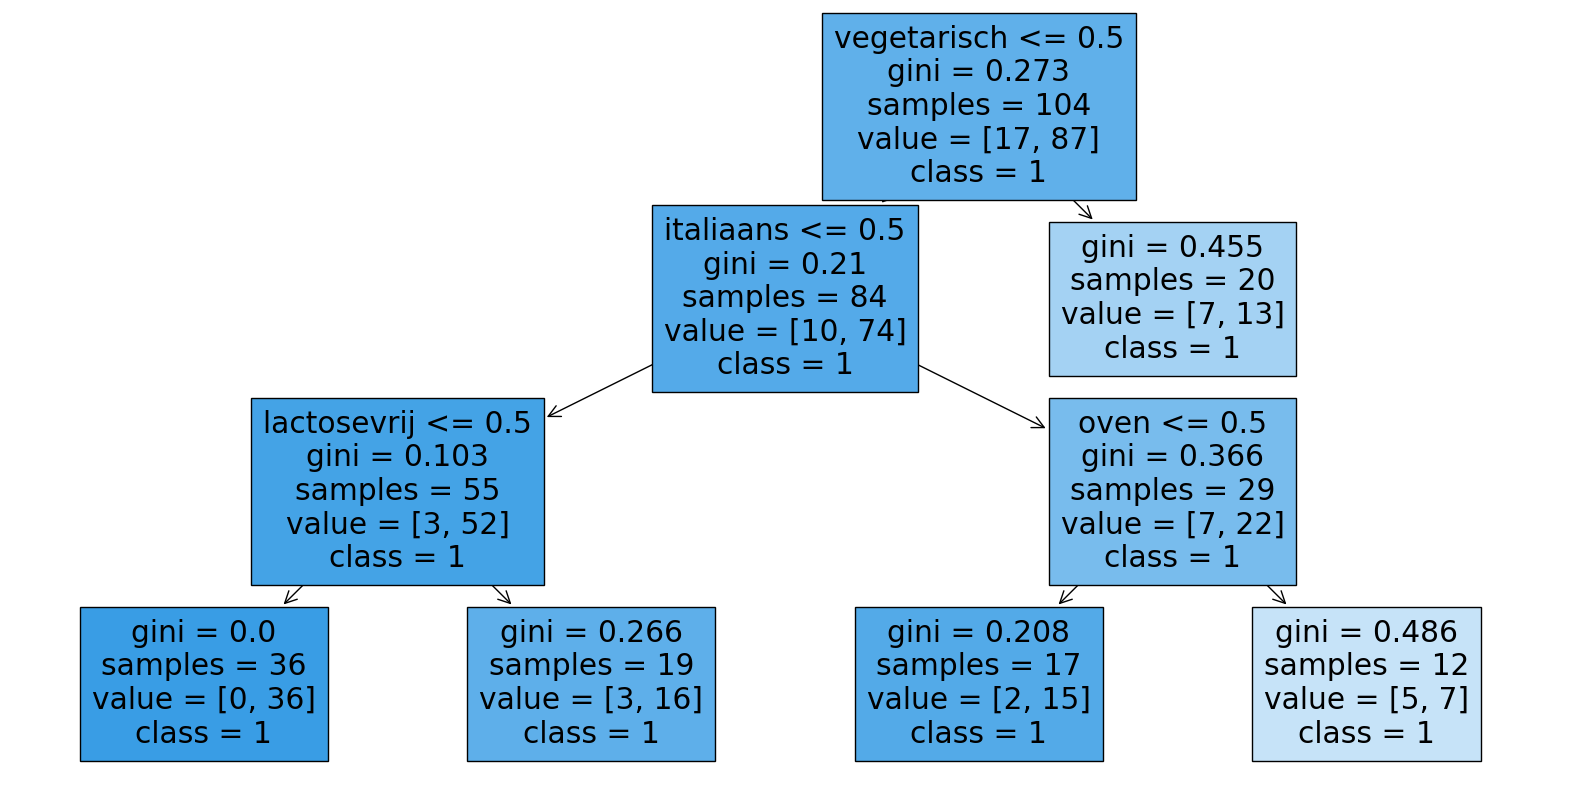

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(DTC, filled=True, feature_names=tags, class_names=['0', '1'])
plt.show()

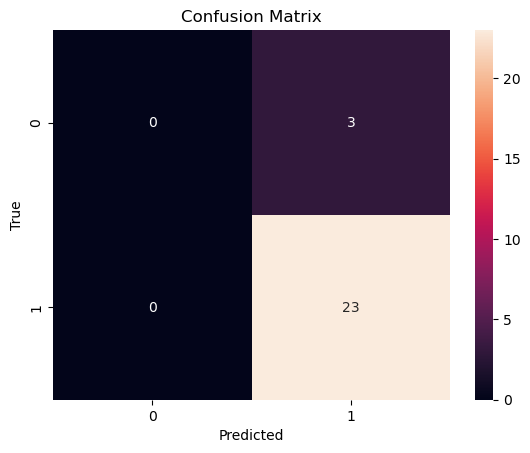

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Random Forest classifer object
RFC = RandomForestClassifier(max_depth=10)

# Train Random Forest Classifer
RFC = RFC.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = RFC.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Creating the Confusion Matrix
cmRFC = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cmRFC)

# Precision Score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Accuracy: 0.7692307692307693
Confusion Matrix:
 [[ 0  6]
 [ 3 30]]
Precision Score: 0.8333333333333334
Recall Score: 0.9090909090909091


In [17]:
from sklearn.svm import SVC

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create SVM classifer object
SVM = SVC()

# Train SVM Classifer
SVM = SVM.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = SVM.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Creating the Confusion Matrix
cmSVM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cmSVM)

# Precision Score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Accuracy: 0.8461538461538461
Confusion Matrix:
 [[ 0  6]
 [ 0 33]]
Precision Score: 0.8461538461538461
Recall Score: 1.0
